# Self Correlation, Self Explanation and Self Prediction

1. AUTOCORRELATION FUNCTION
    * Helps to identify possible structures of time series data
    * Gives a sense of how different points in time relate to each other in away explained by temporal distance
    * Note: looking for autocorrelation for irregular time series(17, 21, 30), it does not make sense
2. PARTIAL AUTOCORRELATION FUNCTION
    * Gives the partial correlation of time series with its own lagged values, controlling for the values of time series at all shorter lags
    * Why would this be useful?

In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from statsmodels.tsa import stattools

/home/vikas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
f = pd.read_csv('data/yahoo_stock.csv')

# Time series relate to themselves
...First, lets look at the auto correlation function

### Let's start with white noise

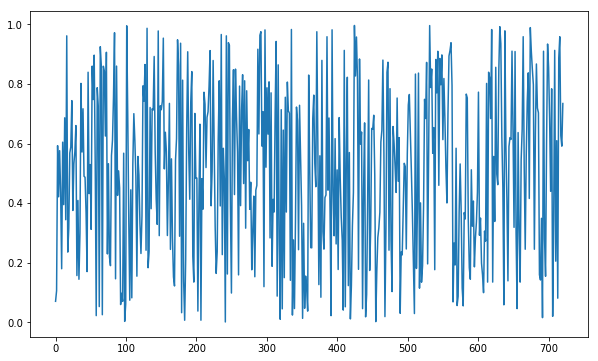

In [4]:
grid = np.linspace(0,720,500)
noise = np.random.rand(500)
result_curve = noise
plt.plot(grid,result_curve)

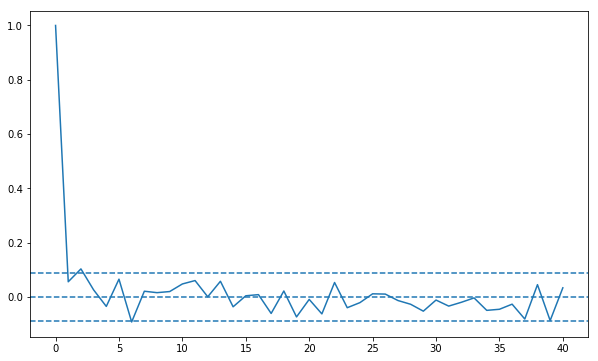

In [5]:
acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### How about a periodic function?

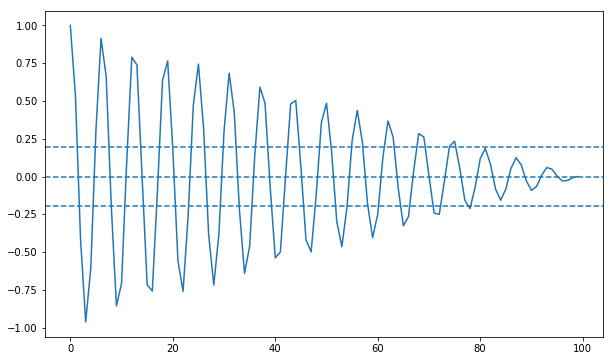

In [6]:
grid = np.linspace(0,100,100)
sin5 = np.sin(grid)
result_curve = sin5
#plt.plot(grid,result_curve)

acf_result = stattools.acf(result_curve,nlags=100)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### Now let's look at a real example

In [7]:
f.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,12.17,12.85,12.12,12.85,12.85,9514600
1,2009-01-05,12.72,13.01,12.39,12.86,12.86,11989900
2,2009-01-06,12.96,13.24,12.88,13.00,13.00,10056000
3,2009-01-07,12.71,13.16,12.45,12.71,12.71,24995900
4,2009-01-08,12.37,13.07,12.31,13.07,13.07,14355000


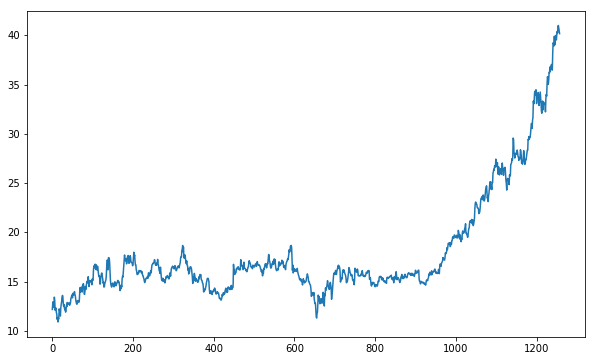

In [8]:
plt.plot(f['Open'])

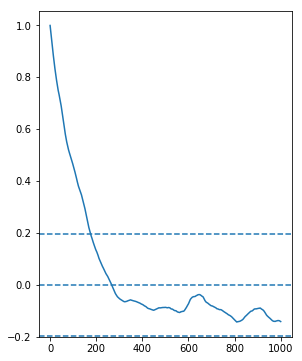

In [11]:
acf_result = stattools.acf(f['Open'],nlags=1000)
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

## This is not useful as there is a high treand in the data

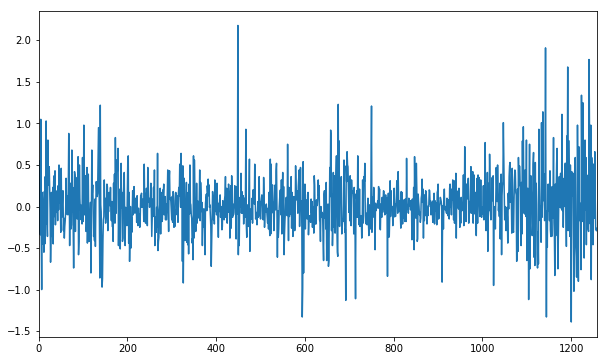

In [12]:
diff_f = f['Open'] - f['Open'].shift()
diff_f.plot()
diff_f.dropna(inplace=True)

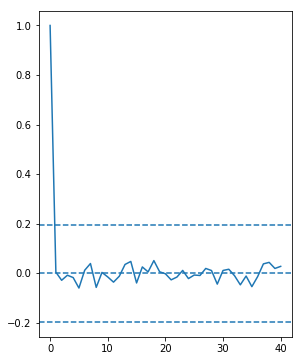

In [13]:
acf_result = stattools.acf(diff_f)
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')